In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling
from IPython.display import display
from wordcloud import WordCloud
import ppscore as pps
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv('./data/train.csv')

In [8]:
#report = ydata_profiling.ProfileReport(train)

In [9]:
#display(report)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

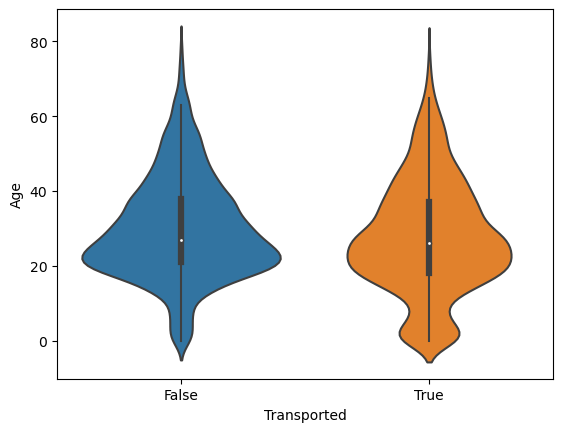

In [10]:
# Age plot of Transported passengers violin plot
sns.violinplot(x='Transported', y='Age', data=train)

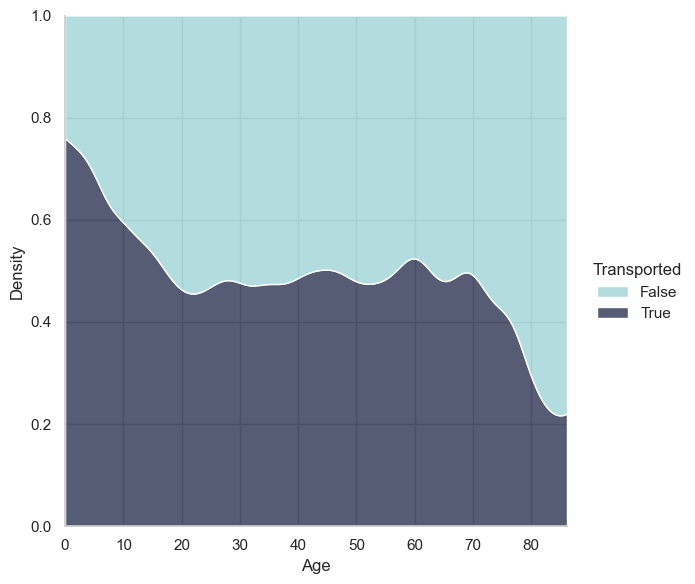

In [11]:
# Distribution plot of Age vs Transported
sns.set_theme(style="whitegrid")

sns.displot(
    data=train,
    x="Age", hue="Transported",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:xlabel='VIP', ylabel='count'>

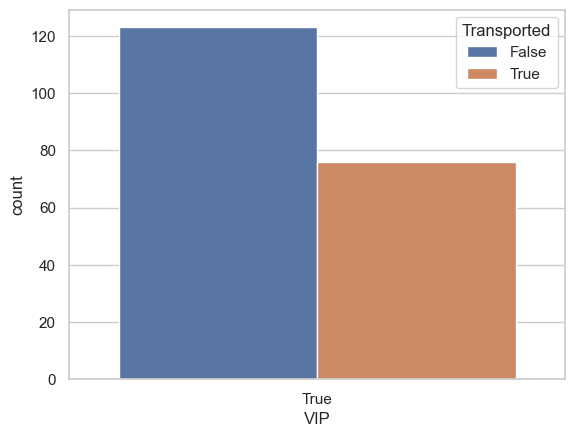

In [12]:
# vip passengers vs. transported
vip = train[train['VIP'] == True]
sns.countplot(x='VIP', hue='Transported', data=vip)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

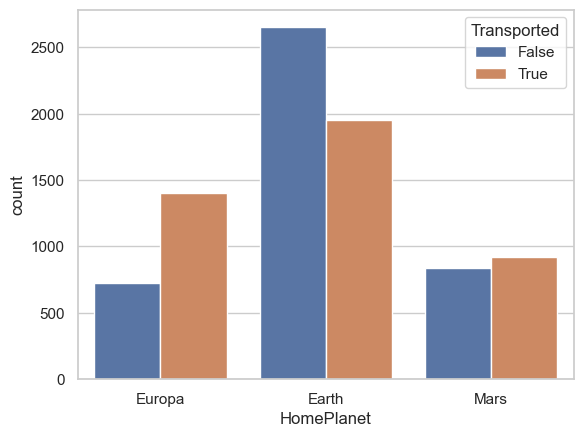

In [13]:
# Home planet vs Transported
sns.countplot(x='HomePlanet', hue='Transported', data=train)

<AxesSubplot:xlabel='Destination', ylabel='count'>

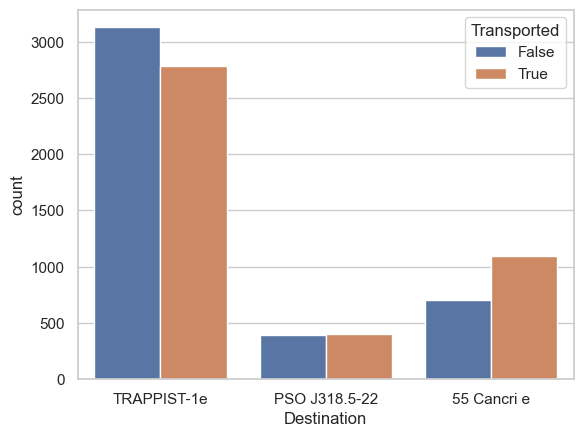

In [14]:
# Destination vs Transported
sns.countplot(x='Destination', hue='Transported', data=train)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

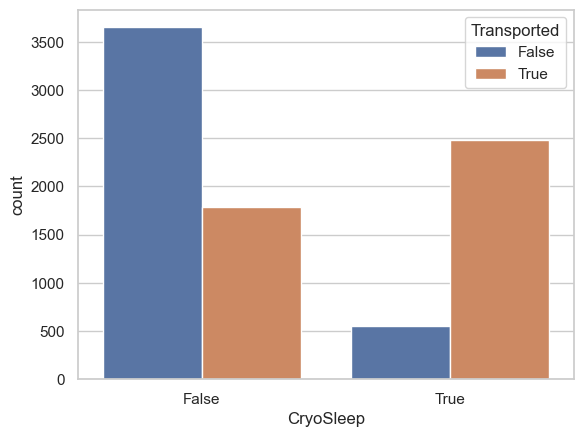

In [15]:
#cryosleep vs transported
sns.countplot(x='CryoSleep', hue='Transported', data=train)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

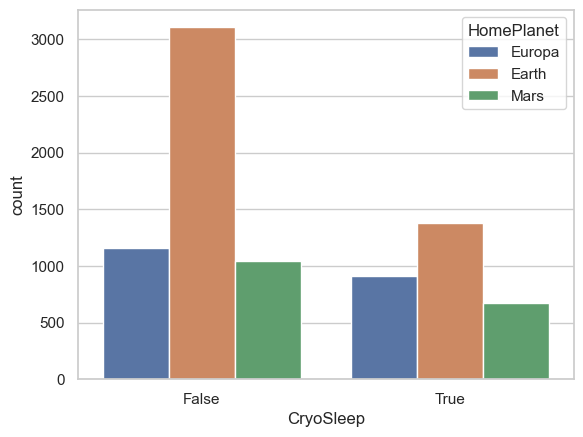

In [16]:
# cryosleep vs homeplanet
sns.countplot(x='CryoSleep', hue='HomePlanet', data=train)

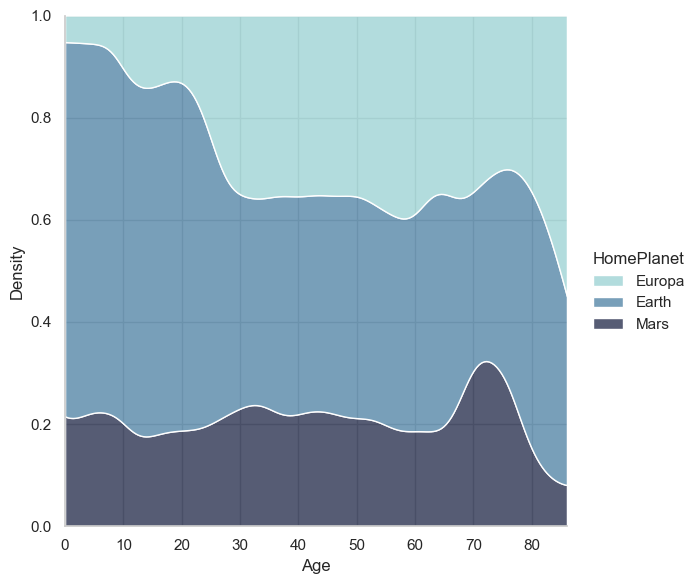

In [44]:
# Distribution plot of Age vs HomePlanet
sns.set_theme(style="whitegrid")

sns.displot(
    data=train,
    x="Age", hue="HomePlanet",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

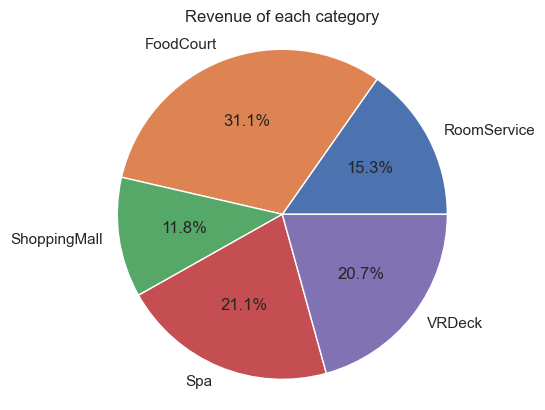

In [18]:
#Revenue of each category
room_service = train['RoomService'].sum()
food_court = train['FoodCourt'].sum()
shopping_mall = train['ShoppingMall'].sum()
spa = train['Spa'].sum()
vr_deck = train['VRDeck'].sum()
# title 'Revenue of each category' pie chart with label "revenue of each category"
fig, ax = plt.subplots()
ax.pie([room_service, food_court, shopping_mall, spa, vr_deck], labels=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Revenue of each category')
plt.show()

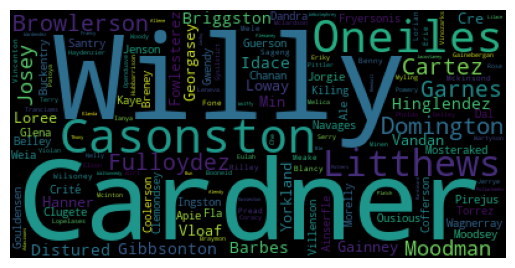

In [19]:
#Word Cloud of Names
names = train['Name'].str.cat(sep=' ')
wordcloud = WordCloud().generate(names)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Cleaning and Feature Engineering

In [4]:
df = train.copy()

In [5]:
# from each cabin extract all the letters
first_letter = df['Cabin'].apply(lambda x: str(x)[0])
last_letter = df['Cabin'].apply(lambda x: str(x)[-1])
df['Cabin'] = first_letter + last_letter

In [6]:
# create new column group from gggg_pp in passengerId where gggg is group
df['Group'] = df['PassengerId'].str[0:4]
df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('size')
df['IsAlone'] = test['GroupSize'] == 1

Missing *homeplanets* can be filled by using group id and members homeplanet and/or their destination

In [7]:
# Fill missing 'homeplanet' values with the mode value of each group
test['HomePlanet'].fillna(test.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_5008\610604322.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['HomePlanet'].fillna(df.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_5008\610604322.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['HomePlanet'].fillna(df.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_5008\610604322.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['HomePlanet'].fillna(df.group

In [8]:
# Fill missing 'destination' values with the mode value of each group
df['Destination'].fillna(df.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_5008\2487317314.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Destination'].fillna(df.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_5008\2487317314.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Destination'].fillna(df.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_5008\2487317314.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Destination'].fillna(

Total Money Spent on Amenities by each passenger

In [9]:
# any nan value in RoomService, FoodCourt, ShoppingMall, Spa, VRDeck will be 0
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)

# total money spent by each person (sum of RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df['SpendingCat'] = pd.cut(df['TotalSpent'], [-1, 500, 12750, np.inf], labels=['Frugal', 'Avid', 'Roller'])

In [11]:
df['CryoSleep'] = df['CryoSleep'].astype('bool')
df['Transported'] = df['Transported'].astype('bool')
df['HomePlanet'] = df['HomePlanet'].astype('category')
df['Destination'] = df['Destination'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')
# Label Encoder
df['HomePlanet'] = LabelEncoder().fit_transform(df['HomePlanet'])
df['SpendingCat'] = LabelEncoder().fit_transform(df['SpendingCat'])
df['Destination'] = LabelEncoder().fit_transform(df['Destination'])
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])

<AxesSubplot:>

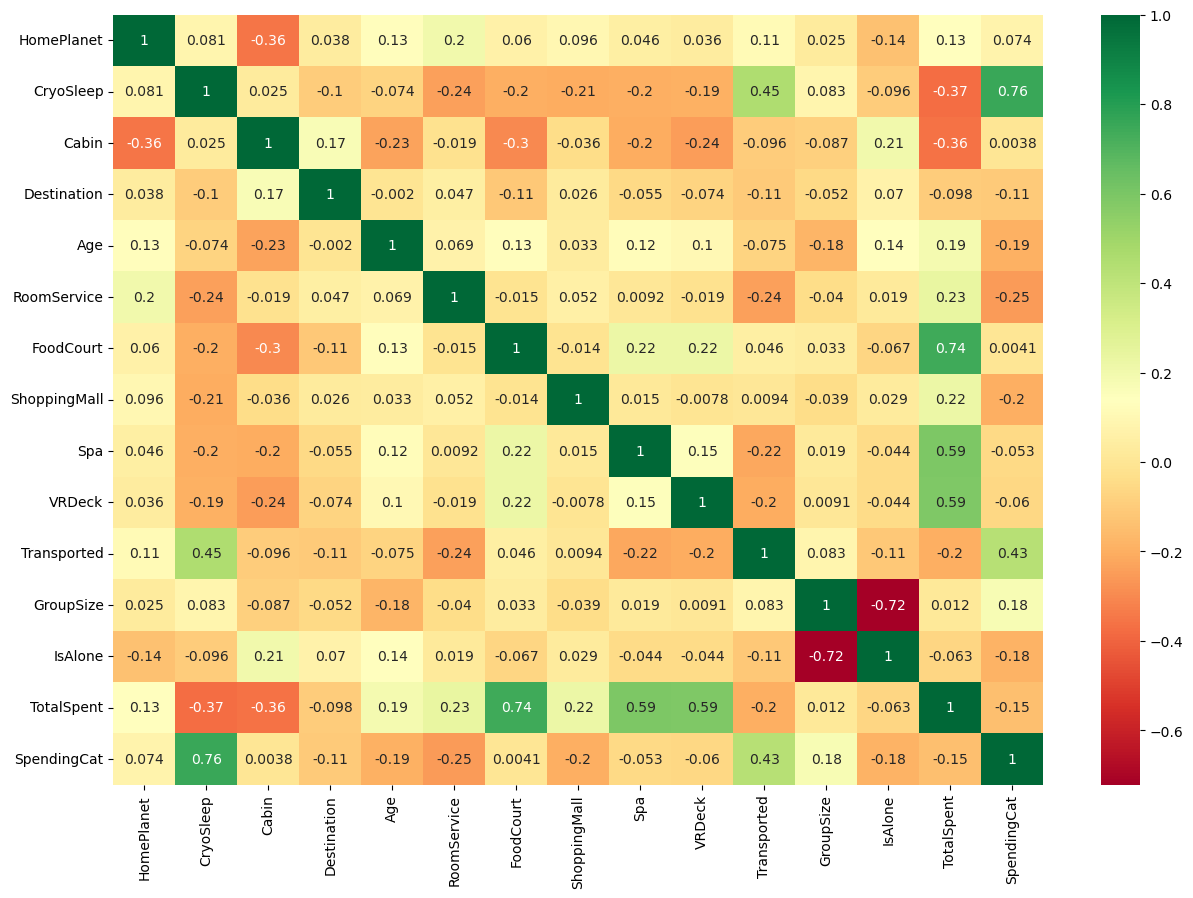

In [12]:
# cabin and transported correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [13]:
#matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
#matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX
#plt.figure(figsize=(12, 6))
#sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True, ax=ax)

* Convert Format

Features = Cryosleep, Foodcourt, Groupsize, Homeplanet, IsAlone, RoomService, ShoppingMall, Spa, SpendingCat, VRDeck, GroupSize, TotalSpent

Model Building

In [14]:
# import Algos
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



from sklearn.model_selection import train_test_split

# import pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score as r2

In [15]:
target = df['Transported']
df = df.drop(['PassengerId','Transported', 'Age', 'VIP', 'Name', 'Group'],  axis=1)

Splitting Testing and Training Data

In [16]:
#Splitting training AND Testing data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

Pipeline Building

In [20]:
clfs = []
etc_best_params = {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
rfc_best_params = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
mlpc_best_params = {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 600, 'solver': 'adam'}


clfs.append(('ETC', ExtraTreesClassifier(**etc_best_params)))
clfs.append(('RFC', RandomForestClassifier(**rfc_best_params)))
clfs.append(('BC', BaggingClassifier()))
clfs.append(('ETC', ExtraTreesClassifier()))
clfs.append(('GBC', GradientBoostingClassifier()))
clfs.append(('HGBC', HistGradientBoostingClassifier(**hgbc_best_params)))
clfs.append(('XGB', XGBClassifier()))
clfs.append(('MLP', MLPClassifier(**mlpc_best_params)))

for name, clf in clfs:
    pipe = Pipeline([('scaler', StandardScaler()), (name, clf)])
    pipe.fit(X_train, y_train)
    print(name, pipe.score(X_test, y_test))
    #print(r2(y_test, pipe.predict(X_test)))

ETC 0.7912593444508338
RFC 0.7889591719378953
BC 0.7832087406555491
ETC 0.78953421506613
GBC 0.7866589994249569
HGBC 0.7935595169637722
XGB 0.7860839562967222
MLP 0.7889591719378953


c:\Users\milan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearch
1. ExtraTreeClassifier: 
   {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
2. RandomForestClassifier: 
   {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
3. HistGradientBoostingClassifier: 
   {'l2_regularization': 0.01, 'learning_rate': 0.1, 'max_depth': 4, 'max_iter': 200, 'max_leaf_nodes': None, 'min_samples_leaf': 2}

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [400, 500, 600]
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\milan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\milan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 600, 'solver': 'adam'}
Best Score: 0.7966654081479604


In [40]:
# predict test data
test = pd.read_csv('./data/test.csv')
# from each cabin extract all the letters
first_letter = test['Cabin'].apply(lambda x: str(x)[0])
last_letter = test['Cabin'].apply(lambda x: str(x)[-1])
test['Cabin'] = first_letter + last_letter
# create new column group from gggg_pp in passengerId where gggg is group
test['Group'] = test['PassengerId'].str[0:4]
test['GroupSize'] = test.groupby('Group')['PassengerId'].transform('size')
test['IsAlone'] = test['GroupSize'] == 1
# Fill missing 'homeplanet' values with the mode value of each group
test['HomePlanet'].fillna(test.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
# Fill missing 'destination' values with the mode value of each group
test['Destination'].fillna(test.groupby('Group')['Destination'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
# any nan value in RoomService, FoodCourt, ShoppingMall, Spa, VRDeck will be 0
test['RoomService'] = test['RoomService'].fillna(0)
test['FoodCourt'] = test['FoodCourt'].fillna(0)
test['ShoppingMall'] = test['ShoppingMall'].fillna(0)
test['Spa'] = test['Spa'].fillna(0)
test['VRDeck'] = test['VRDeck'].fillna(0)

# total money spent by each person (sum of RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
test['TotalSpent'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
test['SpendingCat'] = pd.cut(test['TotalSpent'], [-1, 500, 12750, np.inf], labels=['Frugal', 'Avid', 'Roller'])
test['CryoSleep'] = test['CryoSleep'].astype('bool')
test['HomePlanet'] = test['HomePlanet'].astype('category')
test['Destination'] = test['Destination'].astype('category')
test['Cabin'] = test['Cabin'].astype('category')
# Label Encoder
test['HomePlanet'] = LabelEncoder().fit_transform(test['HomePlanet'])
test['SpendingCat'] = LabelEncoder().fit_transform(test['SpendingCat'])
test['Destination'] = LabelEncoder().fit_transform(test['Destination'])
test['Cabin'] = LabelEncoder().fit_transform(test['Cabin'])
passenger = test['PassengerId'].copy()
test = test.drop(['PassengerId','Age', 'VIP', 'Name', 'Group'],  axis=1)


C:\Users\milan\AppData\Local\Temp\ipykernel_5008\2208729682.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test['HomePlanet'].fillna(test.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_5008\2208729682.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test['HomePlanet'].fillna(test.groupby('Group')['HomePlanet'].transform(lambda x: x.mode().iloc[0] if x.notnull().any() else None), inplace=True)
C:\Users\milan\AppData\Local\Temp\ipykernel_5008\2208729682.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test['HomePlanet']

In [41]:
# predict test dataframe with the best model
y_pred = grid_search.predict(test)

# create submission file
submission = pd.DataFrame({
    'PassengerId': passenger,
    'Transported': y_pred
})
submission.to_csv('submission.csv', index=False)

In [19]:
import winsound
duration = 1000  # milliseconds
freq = 840  # Hz
winsound.Beep(freq, duration)